In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
output_pt = "/content/drive/MyDrive/4041ML/output"

In [3]:
SAVE_PATH = "/content/drive/MyDrive/4041ML/output/feature_eng/"

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv(output_pt + "/train_macro.csv", parse_dates=['timestamp'])
test_df = pd.read_csv(output_pt + "/test_macro.csv", parse_dates=['timestamp'])

In [6]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,98.1,43.3,94.3,55.2,99.3,0.4,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,98.1,43.3,94.3,55.2,99.3,0.4,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,98.1,43.3,94.3,55.2,99.3,0.4,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,98.1,43.3,94.3,55.2,99.3,0.4,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,98.1,43.3,94.3,55.2,99.3,0.4,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9


In [7]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


## NULL Count *

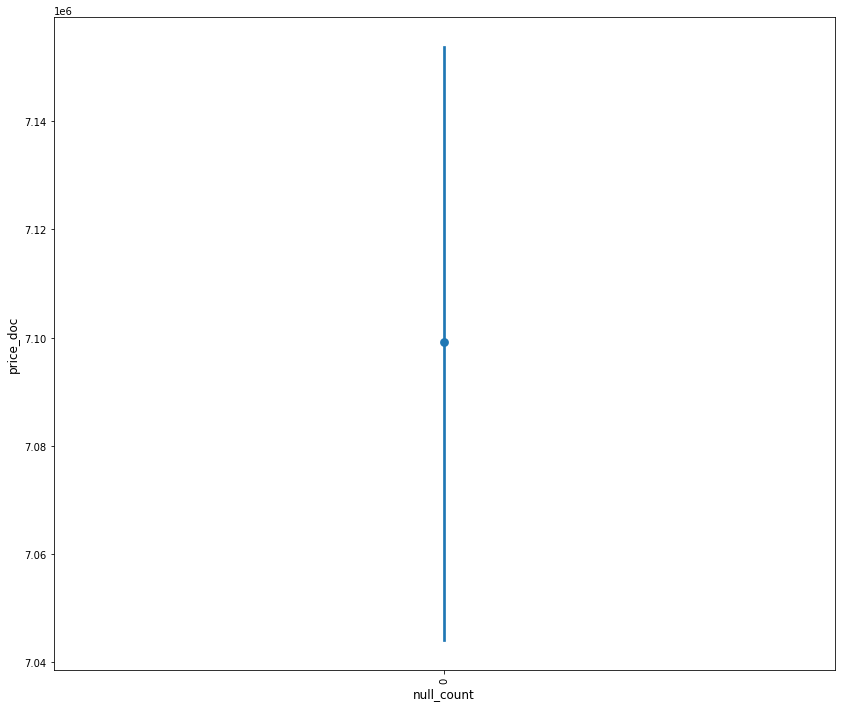

In [8]:
# # NULL transfered to -99, for further test
# train_df["null_count"] = train_df.isnull().sum(axis=1)
# test_df["null_count"] = test_df.isnull().sum(axis=1)

# plt.figure(figsize=(14,12))
# sns.pointplot(x='null_count', y='price_doc', data=train_df)
# plt.ylabel('price_doc', fontsize=12)
# plt.xlabel('null_count', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# test_df = test_df.drop(['null_count'], axis=1)
# train_df = train_df.drop(['null_count'], axis=1)

## Timestamp +6

In [8]:
# year and month #
train_df["yearmonth"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.month
test_df["yearmonth"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.month

# year and week #
train_df["yearweek"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.weekofyear
test_df["yearweek"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.weekofyear

# year #
train_df["year"] = train_df["timestamp"].dt.year
test_df["year"] = test_df["timestamp"].dt.year

# month of year #
train_df["month_of_year"] = train_df["timestamp"].dt.month
test_df["month_of_year"] = test_df["timestamp"].dt.month

# week of year #
train_df["week_of_year"] = train_df["timestamp"].dt.weekofyear
test_df["week_of_year"] = test_df["timestamp"].dt.weekofyear

# day of week #
train_df["day_of_week"] = train_df["timestamp"].dt.weekday
test_df["day_of_week"] = test_df["timestamp"].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [9]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4


In [10]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,76.77,6.1,7.61,662.3,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2


## Area ratio +4

In [11]:
# area of the property is the top variables -> might helpful create some ratio variables around it (3 features added)

# ratio of living area to full area
train_df["ratio_life_full"] = train_df["life_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_life_full"] = test_df["life_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]<0] = 0
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]>1] = 1
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]<0] = 0
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]>1] = 1

# ratio of kitchen area to living area #
train_df["ratio_kitch_life"] = train_df["kitch_sq"] / np.maximum(train_df["life_sq"].astype("float"),1)
test_df["ratio_kitch_life"] = test_df["kitch_sq"] / np.maximum(test_df["life_sq"].astype("float"),1)
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]<0] = 0
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]>1] = 1
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]<0] = 0
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]>1] = 1

# ratio of kitchen area to full area #
train_df["ratio_kitch_full"] = train_df["kitch_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_kitch_full"] = test_df["kitch_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]<0] = 0
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]>1] = 1
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]<0] = 0
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]>1] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [12]:
# the difference between full area and living area

train_df["full_live_diff"] = train_df["full_sq"] - train_df["life_sq"]
test_df["full_live_diff"] = test_df["full_sq"] - test_df["life_sq"]

In [13]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0


In [14]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,211.83,115.64,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874


## Floor Proportion & Top Count +2

In [15]:
# The next important variables from EDA are floor and max_floor -> create two features: floor num/total num of floors; num of floor from the top

# floor of the house to the total number of floors in the apartment
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")

# num of floor from top #
train_df["floor_from_top"] = train_df["max_floor"] - train_df["floor"]
test_df["floor_from_top"] = test_df["max_floor"] - test_df["floor"]

In [16]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0,0.307692,9.0
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,62.89,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0,0.263158,5.6
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0,0.500000,9.0
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0,0.645161,2.2
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,66.28,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0,0.308642,11.2


In [17]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300,0.222222,7.0
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400,0.600000,2.0
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800,1.000000,0.0
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900,0.750000,3.0
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,77.49,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874,0.266667,11.0


## Age of building +1

In [18]:
# Age of building, listing yr - built yr

train_df["age_of_building"] = train_df["year"] - train_df["build_year"]
test_df["age_of_building"] = test_df["year"] - test_df["build_year"]

In [19]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0,0.307692,9.0,35.4
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,47.85,41.80,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0,0.263158,5.6,47.8
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0,0.500000,9.0,8.0
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0,0.645161,2.2,61.2
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,51.15,44.25,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0,0.308642,11.2,31.4


In [20]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300,0.222222,7.0,17.0
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400,0.600000,2.0,55.0
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800,1.000000,0.0,-1.0
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900,0.750000,3.0,43.0
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,52.36,49.35,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874,0.266667,11.0,-2.0


## School +2

In [21]:
# number of children goiong to preschool / seats available in preschool

train_df["ratio_preschool"] = train_df["children_preschool"] / train_df["preschool_quota"].astype("float")
test_df["ratio_preschool"] = test_df["children_preschool"] / test_df["preschool_quota"].astype("float")

train_df["ratio_school"] = train_df["children_school"] / train_df["school_quota"].astype("float")
test_df["ratio_school"] = test_df["children_school"] / test_df["school_quota"].astype("float")

In [22]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0,0.307692,9.0,35.4,1.914817,0.931676
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,36.77,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0,0.263158,5.6,47.8,4.018455,1.112366
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0,0.500000,9.0,8.0,1.913584,0.801149
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0,0.645161,2.2,61.2,1.761111,0.868468
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,37.73,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0,0.308642,11.2,31.4,1.914817,0.931676


In [23]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300,0.222222,7.0,17.0,1.180614,0.601697
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400,0.600000,2.0,55.0,2.867384,0.823249
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800,1.000000,0.0,-1.0,0.541528,0.060221
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900,0.750000,3.0,43.0,1.349321,0.590766
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,39.62,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874,0.266667,11.0,-2.0,2.205835,1.244028


## Apartment +1

In [24]:
# district name + dist to metro by car as str type

train_df['apartment_name']=train_df['sub_area'].astype(str) + train_df['metro_km_avto'].astype(str)
test_df['apartment_name']=test_df['sub_area'].astype(str) + test_df['metro_km_avto'].astype(str)

In [25]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0,0.307692,9.0,35.4,1.914817,0.931676,9.01.131259906
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0,0.263158,5.6,47.8,4.018455,1.112366,129.01.637996285
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0,0.500000,9.0,8.0,1.913584,0.801149,65.00.984536582
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0,0.645161,2.2,61.2,1.761111,0.868468,6.00.876620232
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0,0.308642,11.2,31.4,1.914817,0.931676,9.01.593203381

In [26]:
test_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300,0.222222,7.0,17.0,1.180614,0.601697,38.00.7359083759999999
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400,0.600000,2.0,55.0,2.867384,0.823249,84.01.1222136059999999
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800,1.000000,0.0,-1.0,0.541528,0.060221,104.06.038847546
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900,0.750000,3.0,43.0,1.349321,0.590766,135.05.232565421
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874,0.266667,11.0,-2.0,2.2

## Remove unneeded features for model building

In [28]:
train_X = train_df.drop(["timestamp", "price_doc"], axis=1)
test_X = test_df.drop(["timestamp"] , axis=1)

In [29]:
train_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201133,2011,8,33,5,0.627907,0.266667,0.167442,16.0,0.307692,9.0,35.4,1.914817,0.931676,9.01.131259906
1,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,0.0,129.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.0,4.0,6207.0,5580.0,7.0,0.0,1183.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,101982.0,...,29.07,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201108,201134,2011,8,34,5,0.674419,0.213793,0.144186,14.0,0.263158,5.6,47.8,4.018455,1.112366,129.01.637996285
2,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,0.0,65.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.0,9.0,13670.0,17063.0,10.0,0.0,1128.6,1.0,0.0,17.0,6.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21155.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201135,2011,9,35,3,0.561798,0.164000,0.092135,39.0,0.500000,9.0,8.0,1.913584,0.801149,65.00.984536582
3,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,0.0,6.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.0,7.0,6748.0,7770.0,9.0,0.0,562.0,4.0,2.0,25.0,2.0,0.0,0.0,10.0,93.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28179.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,0,1.000000,0.096104,0.096104,0.0,0.645161,2.2,61.2,1.761111,0.868468,6.00.876620232
4,44.0,44.0,5.0,16.2,1.0,1979.6,3.0,8.6,2.4,0.0,9.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.0,5.0,10309.0,11065.0,5.0,0.0,240.0,1.0,0.0,7.0,3.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86206.0,...,30.63,793.319561,0.0,1391.710938,89.0495,3.0,3.0,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,201109,201136,2011,9,36,4,1.000000,0.195455,0.195455,0.0,0.308642,11.2,31.4,1.914817,0.931676,9.01.593203381

In [30]:
test_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,39.00,20.700,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,0.0,38.0,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1848.2,1.0,0.0,13.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102618.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.300,0.222222,7.0,17.0,1.180614,0.601697,38.00.7359083759999999
1,40.50,25.100,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,0.0,84.0,9.946335e+06,139322.0,0.065409,0.225825,6400.0,2232.0,7.0,6558.0,7966.0,7.0,0.0,1548.0,3.0,0.0,13.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36154.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.400,0.600000,2.0,55.0,2.867384,0.823249,84.01.1222136059999999
2,62.80,36.000,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,1.0,104.0,2.149409e+07,7122.0,0.262459,0.017647,489.0,903.0,0.0,469.0,7788.0,0.0,0.0,176.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9553.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.800,1.000000,0.0,-1.0,0.541528,0.060221,104.06.038847546
3,45.40,28.500,9.0,12.0,5.0,1972.0,2.0,6.0,2.0,0.0,135.0,1.531990e+07,21040.0,0.051549,0.036270,1491.0,1105.0,1.0,1318.0,2231.0,1.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285626.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.900,0.750000,3.0,43.0,1.349321,0.590766,135.05.232565421
4,37.26,22.386,4.0,15.0,4.0,2017.0,1.0,8.0,1.0,1.0,70.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.0,5.0,7759.0,6237.0,8.0,0.0,229.0,1.0,0.0,6.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76284.0,...,30.98,863.394794,5.0,1573.650623,97.8484,2.0,2.0,61.0,90.8,6899.930464,41.9,707.0,286.0,794.0,271.0,10805.0,627.0,0.45888,1440.0,463938.0,28.2,76.2,46080.0,234576.9,201507,201527,2015,7,27,2,0.600805,0.357366,0.214707,14.874,0.266667,11.0,-2.0,2.2

## Log price ?

In [31]:
train_y = np.log1p(train_df.price_doc.values)

In [32]:
train_y[:5]

array([15.58195239, 15.55597691, 16.38812286, 16.60860344, 14.50865824])

## Outputs

In [33]:
TRAIN_X = "train_X.csv"
TEST_X = "test_X.csv"
TRAIN_Y = "train_y.csv"

In [36]:
train_X.to_csv(SAVE_PATH + TRAIN_X, index=False)
test_X.to_csv(SAVE_PATH + TEST_X, index=False)
pd.DataFrame(train_y).to_csv(SAVE_PATH + TRAIN_Y, index=False)